In [1]:
import sys
sys.path.append('/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages')
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import datetime
import warnings
warnings.filterwarnings('ignore')
from datetime import date

In [2]:
stocks = ['MSFT','AAPL','AMZN','GOOG','GOOGL','FB','JNJ','V','PG','JPM','UNH','MA','INTC','VZ','HD','T','PFE','MRK','PEP']


In [3]:
close=pd.DataFrame()
for stock in stocks:
    a1 = yf.Ticker(stock)
    a2= a1.history()
    close[stock]=a2['Close']
close.head()

,MSFT,AAPL,AMZN,GOOG,GOOGL,FB,JNJ,V,PG,JPM,UNH,MA,INTC,VZ,HD,T,PFE,MRK,PEP
Date,,,,,,,,,,,,,,,,,,,
2020-07-07,208.25,372.69,3000.12,1485.18,1489.92,240.86,142.85,194.20,121.45,92.32,296.65,299.51,57.92,54.43,247.35,29.80,33.70,78.72,133.57
2020-07-08,212.83,381.37,3081.11,1496.00,1503.60,243.58,143.27,195.07,122.12,93.30,298.36,300.15,58.21,54.76,249.17,29.94,33.42,77.92,134.22
2020-07-09,214.32,383.01,3182.63,1510.99,1518.66,244.50,142.49,192.21,121.71,91.28,291.16,294.59,58.03,53.94,247.96,29.54,33.14,76.69,132.71
2020-07-10,213.67,383.68,3200.00,1541.74,1539.01,245.07,142.37,192.55,123.11,96.27,291.23,295.68,59.13,54.49,250.11,30.13,33.50,76.73,134.46
2020-07-13,207.07,381.91,3104.00,1511.34,1512.23,239.00,145.21,189.02,123.27,97.65,299.71,290.18,58.18,54.45,249.62,29.76,34.87,77.35,134.91


In [4]:
returns = close.pct_change().dropna()
returns.head()

,MSFT,AAPL,AMZN,GOOG,GOOGL,FB,JNJ,V,PG,JPM,UNH,MA,INTC,VZ,HD,T,PFE,MRK,PEP
Date,,,,,,,,,,,,,,,,,,,
2020-07-08,0.021993,0.023290,0.026996,0.007285,0.009182,0.011293,0.002940,0.004480,0.005517,0.010615,0.005764,0.002137,0.005007,0.006063,0.007358,0.004698,-0.008309,-0.010163,0.004866
2020-07-09,0.007001,0.004300,0.032949,0.010020,0.010016,0.003777,-0.005444,-0.014661,-0.003357,-0.021651,-0.024132,-0.018524,-0.003092,-0.014974,-0.004856,-0.013360,-0.008378,-0.015785,-0.011250
2020-07-10,-0.003033,0.001749,0.005458,0.020351,0.013400,0.002331,-0.000842,0.001769,0.011503,0.054667,0.000240,0.003700,0.018956,0.010197,0.008671,0.019973,0.010863,0.000522,0.013187
2020-07-13,-0.030889,-0.004613,-0.030000,-0.019718,-0.017401,-0.024768,0.019948,-0.018333,0.001300,0.014335,0.029118,-0.018601,-0.016066,-0.000734,-0.001959,-0.012280,0.040896,0.008080,0.003347
2020-07-14,0.006181,0.016548,-0.006443,0.006114,0.005707,0.003054,0.018663,0.022802,0.008437,0.005735,0.029395,0.030223,0.006875,0.018182,0.032730,0.006720,0.000574,0.011635,0.004522


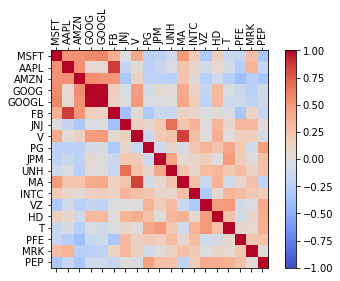

In [5]:
import matplotlib.pyplot as plt
data = returns
corr = returns.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()

In [6]:
returns_mean = returns.mean()
print(returns_mean)
returns_corr=returns.corr()
print(returns_corr)

MSFT     0.001963
AAPL     0.009524
AMZN     0.003611
GOOG     0.000581
GOOGL    0.000568
FB       0.004693
JNJ      0.001500
V        0.001151
PG       0.004067
JPM      0.002516
UNH      0.002691
MA       0.004574
INTC    -0.007262
VZ       0.002793
HD       0.003918
T        0.000107
PFE      0.005941
MRK      0.001395
PEP      0.000804
dtype: float64
           MSFT      AAPL      AMZN      GOOG     GOOGL        FB       JNJ  \
MSFT   1.000000  0.537074  0.531471  0.557499  0.585152  0.386597 -0.003456   
AAPL   0.537074  1.000000  0.543209  0.072336  0.059573  0.871854 -0.168191   
AMZN   0.531471  0.543209  1.000000  0.555988  0.526252  0.522172 -0.310862   
GOOG   0.557499  0.072336  0.555988  1.000000  0.987803  0.167838 -0.034455   
GOOGL  0.585152  0.059573  0.526252  0.987803  1.000000  0.144457 -0.012985   
FB     0.386597  0.871854  0.522172  0.167838  0.144457  1.000000 -0.375267   
JNJ   -0.003456 -0.168191 -0.310862 -0.034455 -0.012985 -0.375267  1.000000   
V      0.40

In [11]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

    

In [12]:
thresh = 0.9
while (len(returns.columns) > 5 ) == True :
    correlation(returns, thresh)
    thresh = thresh - 0.001

In [13]:
print(returns.columns)

Index(['MSFT', 'JNJ', 'PG', 'JPM', 'MRK'], dtype='object')


In [14]:
returns.corr()

,MSFT,JNJ,PG,JPM,MRK
MSFT,1.000000,-0.003456,-0.226759,-0.201225,0.289082
JNJ,-0.003456,1.000000,0.088216,0.206614,0.323314
PG,-0.226759,0.088216,1.000000,-0.113730,-0.085945
JPM,-0.201225,0.206614,-0.113730,1.000000,0.005842
MRK,0.289082,0.323314,-0.085945,0.005842,1.000000


In [15]:
thresh

0.9

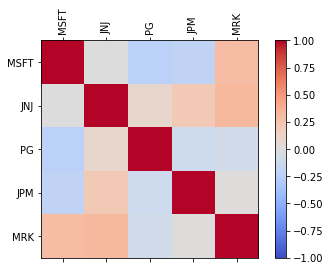

In [16]:
import matplotlib.pyplot as plt
data = returns
corr = returns.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()